In [44]:
import torch
import torchvision
import numpy as np
from torch import nn 
from torch import optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

import torchvision.transforms as tfs
from torch.utils.data import DataLoader

In [45]:
pip show torch

Name: torch
Version: 1.7.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /home/tefi/.local/lib/python3.8/site-packages
Requires: numpy, typing-extensions
Required-by: torchvision
Note: you may need to restart the kernel to use updated packages.


In [46]:
pip show torchvision

Name: torchvision
Version: 0.8.2
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /home/tefi/.local/lib/python3.8/site-packages
Requires: numpy, torch, pillow
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [47]:
!nvcc --version

/usr/bin/sh: 1: nvcc: not found


In [48]:
train_dataset = torchvision.datasets.CIFAR10(root='/home/tefi/Homework/Neural_network', # путь куда будут скачиваться наши данные(если download=true), 
                                                                 # или где лежат наши данные(dowload=False)
                                             train=True, # говорим что используем датасет для обучения  
                                             transform=transforms.ToTensor(), # важная строчка: здесь мы преобразуем данные
                                                                                # из датасета в формат тензоров из торч
                                             download=False)


image, label = train_dataset[0]
print (image.size())
print (label)

torch.Size([3, 32, 32])
6


In [49]:
image.shape

torch.Size([3, 32, 32])

In [50]:
image.permute(1, 2, 0).shape

torch.Size([32, 32, 3])

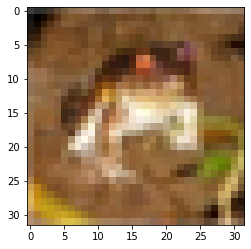

In [51]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [52]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=32, 
                                           shuffle=True)

In [53]:
test_dataset = torchvision.datasets.CIFAR10(root='/home/tefi/Homework/Neural_network', train=False,
                                       download=False, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

In [54]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [60]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        pred = self.fc3(x)
        return pred


#net = Net().to('cuda')

In [61]:
net = Net().to('cpu')

In [62]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=1e-3, betas=(0.9, 0.99))

In [64]:
for epoch in range(20):  # 10 эпох 
    running_loss = 0.0 # Для вывода процесса обучения
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # Обнуляем градиент
        optimizer.zero_grad()
    
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.000
[1,   301] loss: 0.069
[1,   601] loss: 0.075
[1,   901] loss: 0.073
[1,  1201] loss: 0.078
[1,  1501] loss: 0.082
[2,     1] loss: 0.000
[2,   301] loss: 0.067
[2,   601] loss: 0.076
[2,   901] loss: 0.075
[2,  1201] loss: 0.076
[2,  1501] loss: 0.077
[3,     1] loss: 0.000
[3,   301] loss: 0.065
[3,   601] loss: 0.072
[3,   901] loss: 0.074
[3,  1201] loss: 0.075
[3,  1501] loss: 0.078
[4,     1] loss: 0.000
[4,   301] loss: 0.065
[4,   601] loss: 0.069
[4,   901] loss: 0.074
[4,  1201] loss: 0.076
[4,  1501] loss: 0.077
[5,     1] loss: 0.000
[5,   301] loss: 0.062
[5,   601] loss: 0.069
[5,   901] loss: 0.071
[5,  1201] loss: 0.076
[5,  1501] loss: 0.078
[6,     1] loss: 0.000
[6,   301] loss: 0.061
[6,   601] loss: 0.068
[6,   901] loss: 0.071
[6,  1201] loss: 0.073
[6,  1501] loss: 0.075
[7,     1] loss: 0.000
[7,   301] loss: 0.064
[7,   601] loss: 0.066
[7,   901] loss: 0.068
[7,  1201] loss: 0.071
[7,  1501] loss: 0.075
[8,     1] loss: 0.000
[8,   301] 

In [65]:
PATH = '/home/tefi/Homework/Neural_network/cifar_version.pth'
torch.save(net.state_dict(), PATH)

In [66]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [67]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:    cat  ship  ship plane


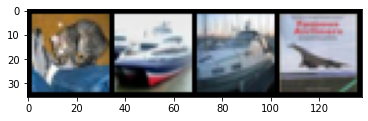

In [68]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
features = 32*32*3
features

In [ ]:
model = nn.Sequential(
  nn.Linear(features, 64),
  nn.ReLU(),
  nn.Dropout(0.2),
  nn.Linear(64, classes),
  nn.Softmax()
  
)

model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3, betas=(0.9, 0.99))